# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model 'TRANSFER LEARNING: INCEPTION-V3 BASED CUSTOM CLASSIFICATION
APPROACH FOR FOOD IMAGES'

**Student Name:**Vivek Borade

**PRN No:**202201040216

**Date of Submission:** 26/2/2025

**Group Members**: 1) Nirmal Chaturvedhi
                   2) Abjeet Jadhav

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [ ]:
!kaggle datasets download -d l33tc0d3r/indian-food-classification


Dataset URL: https://www.kaggle.com/datasets/l33tc0d3r/indian-food-classification
License(s): MIT
100% 1.48G/1.48G [00:22<00:00, 98.0MB/s]
100% 1.48G/1.48G [00:22<00:00, 71.5MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("indian-food-classification.zip", "r") as zip_ref:
    zip_ref.extractall("food_dataset")  # Extract to folder

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    'food_dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'food_dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 5016 images belonging to 1 classes.
Found 1253 images belonging to 1 classes.


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

Original Image Range: 0.0 to 1.0
Augmented Image 1 Range: 5.4010115e-06 to 0.0039170994
Augmented Image 2 Range: 5.866912e-06 to 0.003921569
Augmented Image 3 Range: 3.3196993e-05 to 0.0039165933
Augmented Image 4 Range: 2.4944502e-06 to 0.003895182
Augmented Image 5 Range: 0.0 to 0.0039215065
Augmented Image 6 Range: 2.5121608e-07 to 0.003921569
Augmented Image 7 Range: 0.00014337251 to 0.0038698798
Augmented Image 8 Range: 6.927763e-05 to 0.0038861393
Augmented Image 9 Range: 0.00010849554 to 0.0039015603


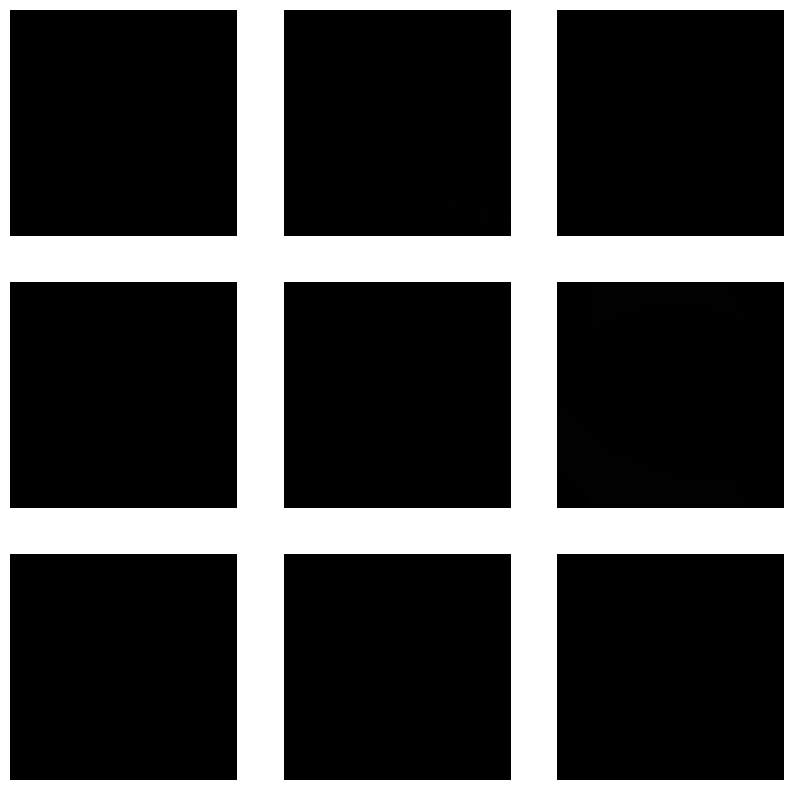

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
import matplotlib.pyplot as plt
import numpy as np

# Apply Data Augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    Rescaling(1./255)  # Normalize pixel values between 0 and 1
])

# Get a batch of images
images, labels = next(iter(train_data))  # Use iter() to properly extract batch

# Debug: Check image pixel values before augmentation
print("Original Image Range:", np.min(images), "to", np.max(images)) # Removed .numpy() as 'images' is already a NumPy array

# Plot Augmented Images
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_img = data_augmentation(images[i])  # Apply augmentation
    img_array = augmented_img.numpy()

    # Debug: Check pixel value range
    print(f"Augmented Image {i+1} Range:", np.min(img_array), "to", np.max(img_array))

    # Convert image back to displayable format
    img_array = (img_array * 255).astype("uint8")  # Convert [0,1] → [0,255]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.axis("off")

plt.show()

**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

In [ ]:
##Code for Task 3

**Conclusion and Result Visulaization**

**Declaration**

I, [Your Name], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: [Full Name]

**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results